In [ ]:
"""
 Burada çok basit bir cnn modeli oluşturacağız, konvülasyon kullanıp(activationumuz relu fonksiyonu lineer olmayan bir durum elde etmek için) weightlerimizi loss ve accuarcy'lerimizi güncellicek,
forward propagation backpropagation ile ağırlıklarımızı tekrardan oluşturacağız ve konvülasyon sonucu ile derinliğimizi arttıracağız(daha fazla feature map olduğundan mı?), pooling ile
ekran boyutunu küçültüp(max min pooling ile) bu sonuçları flatten layer ile tek boyuta indirecek, ardından da neural network'deki mlp yapısını(input layer-hidden layer-output layer) kullanarak
bir öğrenme gerçekleştireceğiz, ardından da softmax çıktısı ile outputumuzu elde edeceğiz.
"""
"""
 Önce modelimizi oluşturacağız, 2 adet konvülasyon katmanı ekleyeceğiz, ardından modelimizi oluşturacağızz, sonra da datasetimizi(bunu hazır bi yerden alacağız) train ve test olarak ayırıp eğitimde
 bu datasetimiz kullanacağız
"""

In [7]:
import tensorflow as tf
from tensorflow.keras import models, layers, Sequential
import matplotlib.pyplot as plt# burada görselleştirmeden yardım albailiriz

In [9]:
model = Sequential()
# İlk konvülasyon katmanımızı ekliyoruz, burada ne yaptık, öncelikte 32 filtre kullanacağız, kernelimiz yani rastgele ağırlıklara sahip olacak filtrelerimiz 3 e 3 matris olacaktır, aktivasyonumuz
#doğrusal olmamazlık katması için relu olacak, giriş ekranımızı 28'e 28 olacak ama padding yapmadığımız için bu shape bir miktar azalacaktır, ama bu pooling gibi yarıya inmek değildir yani poolingler hep
#yarıya düşürmez ama poolingdeki gibi öyle fazla düşme değildir bu, veri kaybını engellemek için kenarlara 0 da eklenebilir ama padding yapmak istemedim
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
# Şimdi ise pooling katmanımızı ekleyelim, max pooling yapıcam, 2 ye 2 matris yapacağımdan yarıya düşecek shapemiz
model.add(layers.MaxPooling2D((2,2)))
# Şimdi ise ikinci konvülasyon katmanımızı ekliyoruz, filtre sayımızı arttırdık, bazen daha iyi sonuç almamıza yarıyor
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
# Şimdi ise son pooling katmanımızı ekliyoruz, ardından flatten katmanı ile tek boyutluk dizimizi elde edeceğiz
model.add(layers.MaxPooling2D((2,2)))
# Şimdi ise flatten katmanımızı ekliyoruz bu tek boyutluk dizi verecek bize
model.add(layers.Flatten())
# Şimdi ise neural network içindeki hidden layer ve output layerimizi yapalım
model.add(layers.Dense(64,activation='relu'))
# Şimdi ise output layerımızı yapalım, burada 10 çıkış bekliyoruz
model.add(layers.Dense(10,activation='softmax'))
# Şimdi ise modelimizi optimize edelim, burada crossenthropy ve adam kullanacağım hep yaptığım şekil bu
model.compile(optimizer=tf.keras.optimizers.Adam(),loss = tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])
# Evet modelimiz artık hazır şimdi summary ile bi bakalım
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Summaryi de görebileceğimiz gibi ilk konvülasyon sonrarsı shapemiz 26 olmuş, sonra ise pooling ile yarıya düşüyor ardından 1 düşmüş tekrardan konvülasyon sonrası ve tekrardan pooling ile ekran küçültme sonucu 5'e düşmüş, ardından flatten katmanında tek bir array elde edilmiş

Train images shape: (60000, 28, 28)
Test images shape: (10000, 28, 28)


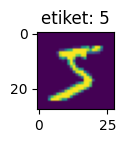

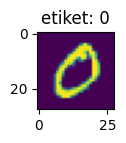

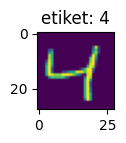

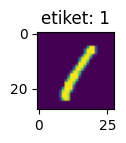

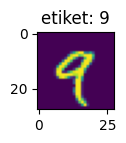

In [46]:
# Şimdi ise veri setimizi indirelim ve train test olarak ayırdıktan sonra modelimizi fit edelim, ardından tahmin için bir predict yaparız ve modelimizin performansını görürüz
# ayrıca şu da önemli bizim indirdiğimiz veri setindeki resimler gray scale yani normalde r g b kanallarından kurtulmak için resimleri önce gray scale hale getirim ondan sonra normalizasyon yaparız
# ve sonrasında veri setlerini kullanırız
from tensorflow.keras.datasets import mnist
import numpy as np
# Verimizi indirelim, ben normal ml deki gibi train test split mantığında düşünüyorum
(train_images,train_etiketleri),(test_images,test_etiketleri) = mnist.load_data()
# Şimdi normalizasyon yapacağız, bu 0 ile 255 arasında olan pixel değerlerini 0 ila 1 arasında getirecektir, bunu ml de de yapıyorduk, pixel değerleri 0 ila 255 arasında olduğu için 255 e bölüyoruz
#önce kaç adet resim olduğunu bulalım
print("Train images shape:", train_images.shape)
#60.000 adetmiş
print("Test images shape:", test_images.shape)
#10.000 adetmiş
# önce hepsini float ile tek bir değere indirelim, sonra da reshape ile 28 e 28 bir resim yapalım
train_images = train_images.astype('float32') / 255
# 60.000 adet resim olduğu için 60.000 adet diyoruz
train_images = train_images.reshape((60000,28,28,1))
test_images = test_images.astype('float32') / 255
# 10.000 adet resim olduğu için 10.000 adet diyoruz
test_images = test_images.reshape((10000,28,28,1))
# Şimdi plt ile resimleri çok basit bir şekilde gösterelim
for i in range(0,5):
    # pencere oluşturalım
    plt.figure(figsize=(1,1))
    # resmi gösterelim
    plt.imshow(train_images[i])
    # burada başlık olutşturuyoruz grafik başlığı ama iş görücek
    plt.title(f"etiket: {train_etiketleri[i]}")
    # resimleri gösterelim daha doğrusu grafiği
    plt.show()


In [17]:
# Şimdi ise modelimizi eğitelim, burada epochs 5 yaptık yani veri seti baştan sonra 5 kere elden geçirilcek model içinde ve veriler 64'er 64'er yollanacak
model.fit(train_images,train_etiketleri,epochs=5,batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 48s 50ms/step - accuracy: 0.8856 - loss: 0.3817
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 48ms/step - accuracy: 0.9824 - loss: 0.0571
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 49ms/step - accuracy: 0.9873 - loss: 0.0404
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 45s 48ms/step - accuracy: 0.9915 - loss: 0.0275
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.9933 - loss: 0.0214


In [19]:
# Test seti üzerinde değerlendirme yap
test_loss, test_acc = model.evaluate(test_images, test_etiketleri)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9863 - loss: 0.0442
Test accuracy: 0.9890


In [65]:
# şimdi indirdiğimiz bir resim ile test edelim predict edelim yani
from google.colab import files
uploaded_png = files.upload()

Saving indir2.png to indir2.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
tahmin edilen softmax olasılık çıkışı  [[2.7651361e-01 4.9947742e-03 6.6688162e-01 3.2925133e-08 1.8832948e-02
  5.3269731e-09 1.4886637e-09 3.2722436e-02 5.4070799e-05 4.8341985e-07]]
Tahmin edilen rakam:  2
--------------------------------------------
sayının gerçeği


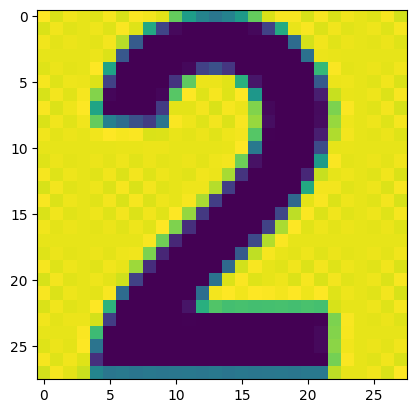

In [79]:
from PIL import Image
# resmi açalım ve onu grayscale yapalım
img= Image.open("indir2.png").convert("L")
# resmimizi 28 e 28 yapıyoruz çünkü biz ilk konvülasyon katmanımızda 28 e 28 lik görselleri kullandık
img = img.resize((28,28))
img_to_show  = img.resize((28,28))
# şimdi resmimizi diziye çevirdikten sonra normalize edeeceğiz
img_dizi = np.array(img)
# resmimizi önce normalize edelim, pixel değerlerini 0 ila 1 arasında sığdıralım
img = img_dizi.astype('float32') / 255
# resmimizi 28 e 28 yapıyoruz çünkü biz ilk konvülasyon katmanımızda 28 e 28 lik görselleri kullandık böyle ayarlamamız lazım predict edeceğimiz resmi
# burada 1 resim 28 e 28 e olacak ve 1 adet kanal yani grayscale rgp olsaydı 3 derdik
img = img.reshape((1,28,28,1))
# şimdi ise predict edelim
tahmin = model.predict(img)
print("tahmin edilen softmax olasılık çıkışı ",tahmin)
# en yüksek ihtimali alalım np.argmax() ile
tahmin = np.argmax(tahmin)
print("Tahmin edilen rakam: ",tahmin)
print("--------------------------------------------")
print("sayının gerçeği")
plt.imshow(img_to_show)